In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import pydotplus
from io import StringIO
import matplotlib.image as mpimg
from sklearn import tree

In [2]:
df = pd.read_csv('/Users/sanjitteja/Desktop/ML/Train.csv.xls')
df.drop('Employee_ID', axis = 1, inplace = True)
df.head()
# print(df1.head())

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gender                     7000 non-null   object 
 1   Age                        6588 non-null   float64
 2   Education_Level            7000 non-null   int64  
 3   Relationship_Status        7000 non-null   object 
 4   Hometown                   7000 non-null   object 
 5   Unit                       7000 non-null   object 
 6   Decision_skill_possess     7000 non-null   object 
 7   Time_of_service            6856 non-null   float64
 8   Time_since_promotion       7000 non-null   int64  
 9   growth_rate                7000 non-null   int64  
 10  Travel_Rate                7000 non-null   int64  
 11  Post_Level                 7000 non-null   int64  
 12  Pay_Scale                  6991 non-null   float64
 13  Compensation_and_Benefits  7000 non-null   objec

In [4]:
df.shape

(7000, 23)

In [5]:
df.isna().sum()

Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

In [6]:
df[df['Pay_Scale'].isnull()] = df['Pay_Scale'].mode()[0]
df[df['Work_Life_balance'].isnull()] = df['Work_Life_balance'].mode()[0]

In [7]:
df[['Time_of_service', 'Time_since_promotion', 'growth_rate', 'Pay_Scale', 'Work_Life_balance', 'Attrition_rate']][~df['Age'].isnull()]

,Time_of_service,Time_since_promotion,growth_rate,Pay_Scale,Work_Life_balance,Attrition_rate
0,4.0,4,33,7.0,3.0,0.1841
1,5.0,4,36,6.0,4.0,0.0670
2,27.0,3,51,8.0,1.0,0.0851
3,4.0,3,56,8.0,1.0,0.0668
4,5.0,4,62,2.0,3.0,0.1827
...,...,...,...,...,...,...
6995,4.0,1,20,6.0,3.0,0.7839
6996,16.0,2,59,4.0,3.0,0.1055
6997,10.0,1,59,3.0,4.0,0.7847
6998,24.0,1,21,8.0,2.0,0.4162


In [8]:
df['Age'][df['Age'].isnull()]

7      NaN
15     NaN
25     NaN
40     NaN
43     NaN
        ..
6916   NaN
6945   NaN
6969   NaN
6981   NaN
6986   NaN
Name: Age, Length: 412, dtype: float64

In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [10]:
target_vars = ['Age', 'Time_of_service', 'VAR2', 'VAR4']
features = ['Time_since_promotion', 'growth_rate', 'Pay_Scale', 'Work_Life_balance', 'Attrition_rate']

for target in target_vars:
    # Splitting the data
    X_train = df[features][~df[target].isnull()]
    y_train = df[target][~df[target].isnull()]
    X_pred = df[features][df[target].isnull()]

    # Training the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predicting missing target variable values
    y_pred = model.predict(X_pred)

    # Imputing missing target variable values
    df.loc[df[target].isnull(), target] = y_pred


In [11]:

df.isna().sum()

Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR3                         0
VAR4                         0
VAR5                         0
VAR6                         0
VAR7                         0
Attrition_rate               0
dtype: int64

In [12]:
df.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,...,type2,3.0,4,0.7516,1.8688,2.000000,4,5,3,0.1841
1,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,...,type2,4.0,3,-0.9612,-0.4537,2.000000,3,5,3,0.0670
2,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,...,type2,1.0,4,-0.9612,-0.4537,3.000000,3,8,3,0.0851
3,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,...,type2,1.0,3,-1.8176,-0.4537,1.839239,3,7,3,0.0668
4,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,...,type3,3.0,1,0.7516,-0.4537,2.000000,2,8,2,0.1827


In [13]:
categorical_cols = ['Gender', 'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess', 'Compensation_and_Benefits']
for col in categorical_cols:
    print(f'{col}---->{df[col].unique()}')

Gender---->['F' 'M' np.float64(8.0) np.float64(1.0)]
Relationship_Status---->['Married' 'Single' np.float64(8.0) np.float64(1.0)]
Hometown---->['Franklin' 'Springfield' 'Clinton' 'Lebanon' 'Washington' np.float64(8.0)
 np.float64(1.0)]
Unit---->['IT' 'Logistics' 'Quality' 'Human Resource Management' 'Purchasing'
 'Sales' 'Production' 'Operarions' 'Accounting and Finance' 'Marketing'
 'R&D' 'Security' np.float64(8.0) np.float64(1.0)]
Decision_skill_possess---->['Conceptual' 'Analytical' 'Behavioral' 'Directive' np.float64(8.0)
 np.float64(1.0)]
Compensation_and_Benefits---->['type2' 'type3' 'type0' 'type4' 'type1' np.float64(8.0) np.float64(1.0)]


In [14]:
df = df[~df[categorical_cols].isin([8.0, 1.0]).any(axis=1)]

In [15]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
for feature in ['Gender', 'Relationship_Status', 'Decision_skill_possess', 'Compensation_and_Benefits', 'Hometown']:
    df[feature] = LE.fit_transform(df[feature])
df.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,0,42.0,4,0,1,IT,2,4.0,4,33,...,2,3.0,4,0.7516,1.8688,2.000000,4,5,3,0.1841
1,1,24.0,3,1,3,Logistics,0,5.0,4,36,...,2,4.0,3,-0.9612,-0.4537,2.000000,3,5,3,0.0670
2,0,58.0,3,0,0,Quality,2,27.0,3,51,...,2,1.0,4,-0.9612,-0.4537,3.000000,3,8,3,0.0851
3,0,26.0,3,1,2,Human Resource Management,1,4.0,3,56,...,2,1.0,3,-1.8176,-0.4537,1.839239,3,7,3,0.0668
4,0,31.0,1,0,3,Logistics,2,5.0,4,62,...,3,3.0,1,0.7516,-0.4537,2.000000,2,8,2,0.1827


In [16]:
frequency_encoded = df.groupby('Unit').size()
df['Unit'] = df['Unit'].map(frequency_encoded)


In [17]:
obj_data=df.dtypes[df.dtypes=="object"].index.to_list()
print(obj_data)

[]


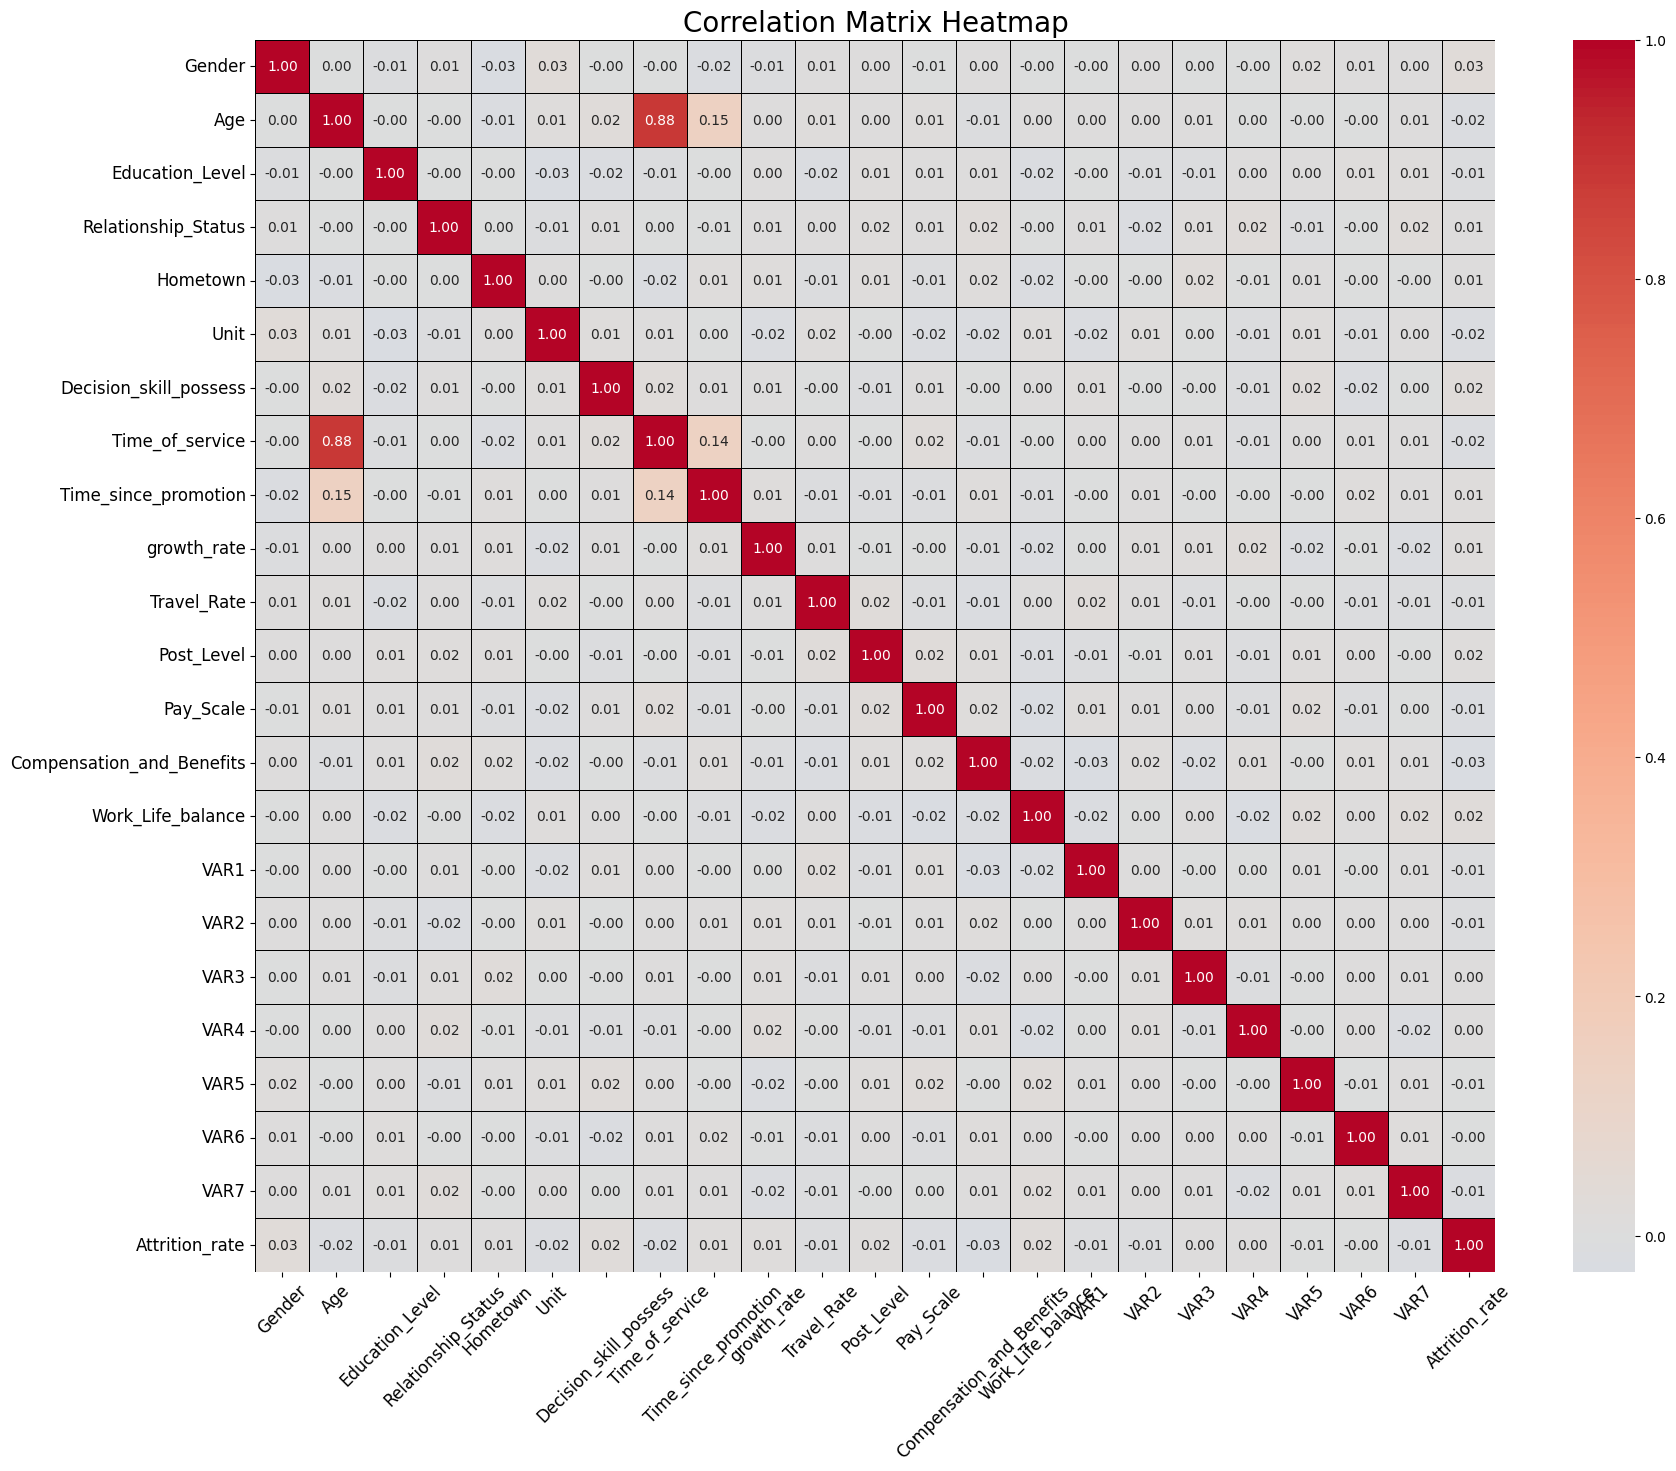

In [18]:
correlation_matrix = df.corr()
# print(correlation_matrix)
plt.figure(figsize=(20, 16))

# Generate a heatmap with detailed annotations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5, linecolor='black')

# Customize the heatmap
plt.title('Correlation Matrix Heatmap', fontsize=20)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Show the heatmap
plt.show()



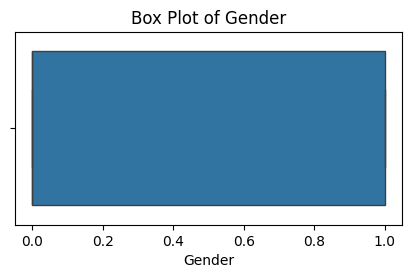

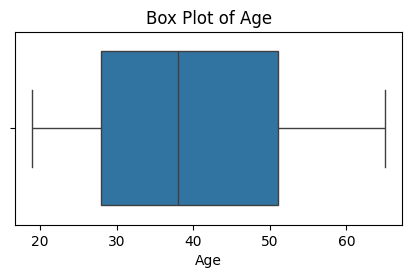

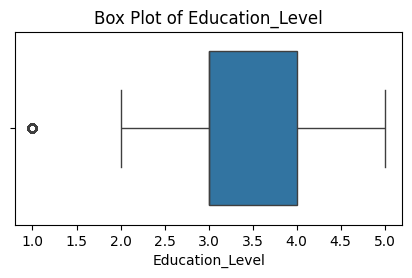

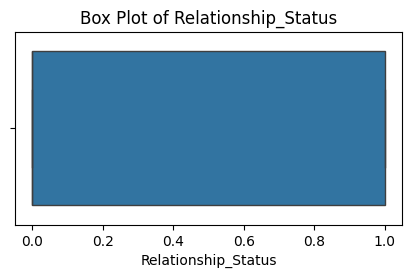

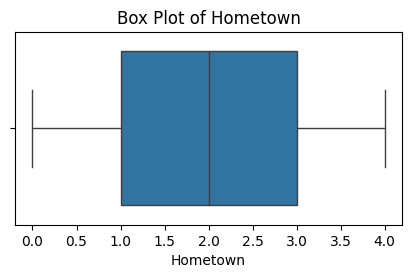

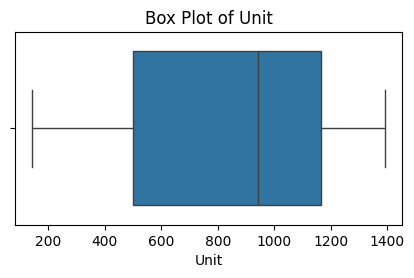

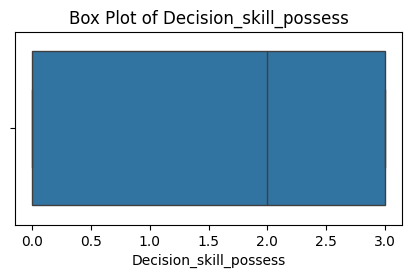

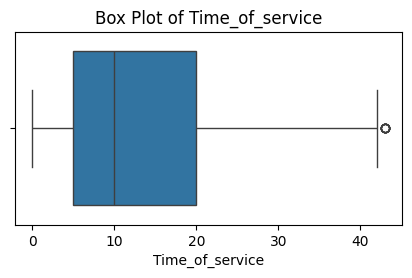

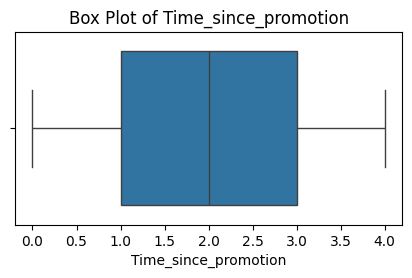

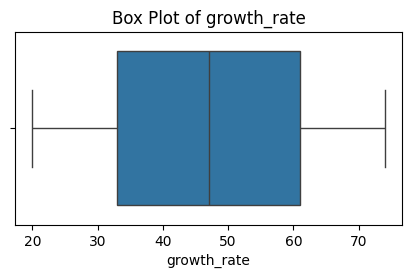

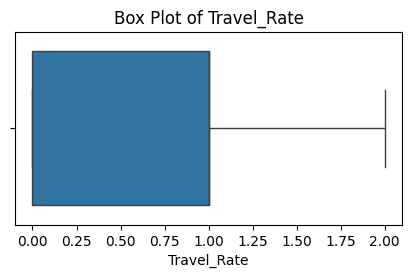

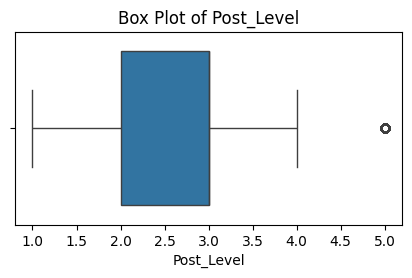

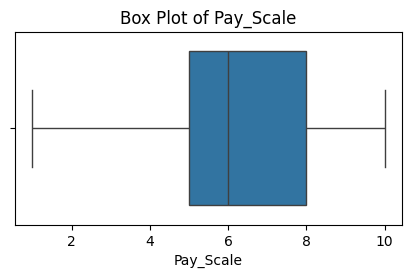

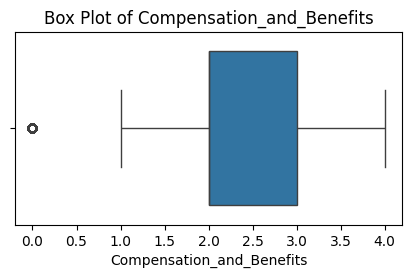

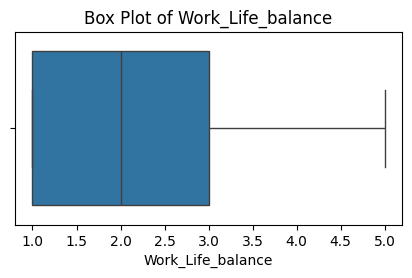

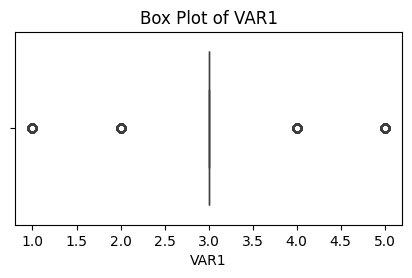

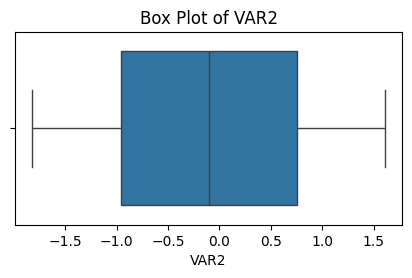

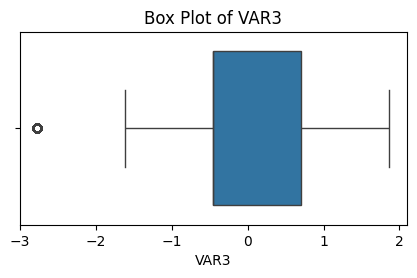

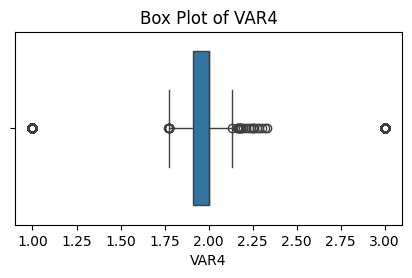

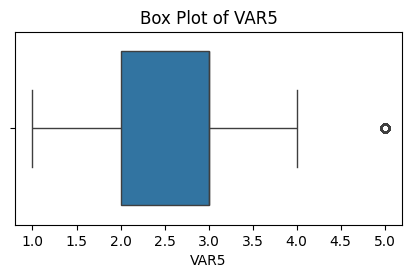

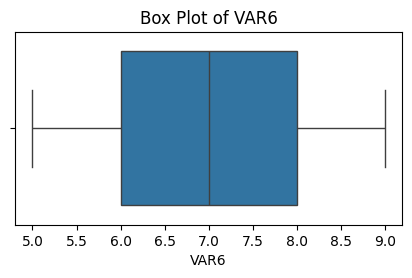

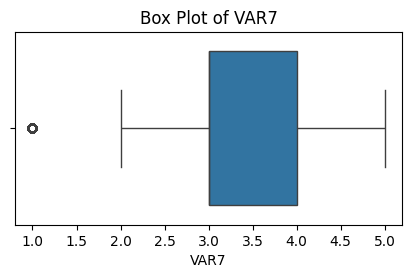

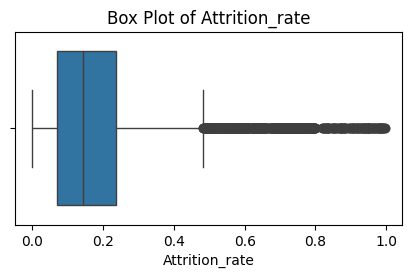

In [19]:
for column in df.columns:
    plt.figure(figsize=(5, 2.5))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

In [20]:
df['Attrition'] = df['Attrition_rate'].apply(lambda x: 1 if x > 0.35 else 0)

df.drop('Attrition_rate', axis=1, inplace=True)


In [21]:
df['Attrition'].value_counts()

Attrition
0    6163
1     818
Name: count, dtype: int64

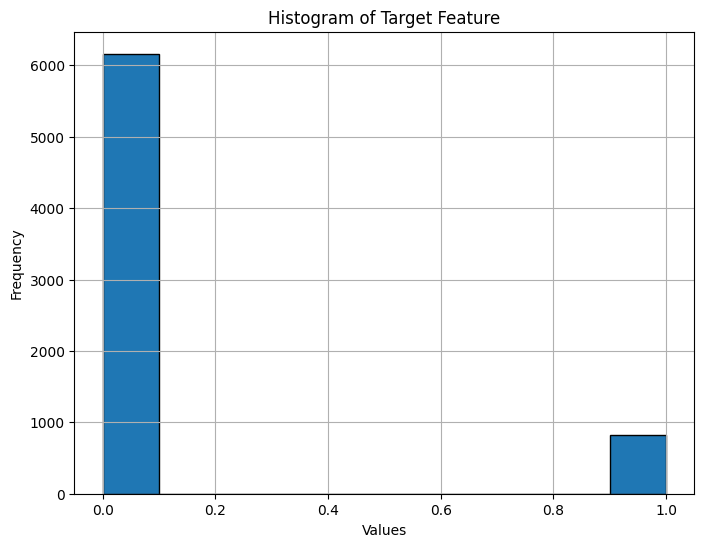

In [22]:
plt.figure(figsize=(8, 6))
plt.hist(df['Attrition'], bins=10, edgecolor='black')
plt.title('Histogram of Target Feature')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Education_Level'}>,
        <Axes: title={'center': 'Relationship_Status'}>,
        <Axes: title={'center': 'Hometown'}>],
       [<Axes: title={'center': 'Unit'}>,
        <Axes: title={'center': 'Decision_skill_possess'}>,
        <Axes: title={'center': 'Time_of_service'}>,
        <Axes: title={'center': 'Time_since_promotion'}>,
        <Axes: title={'center': 'growth_rate'}>],
       [<Axes: title={'center': 'Travel_Rate'}>,
        <Axes: title={'center': 'Post_Level'}>,
        <Axes: title={'center': 'Pay_Scale'}>,
        <Axes: title={'center': 'Compensation_and_Benefits'}>,
        <Axes: title={'center': 'Work_Life_balance'}>],
       [<Axes: title={'center': 'VAR1'}>,
        <Axes: title={'center': 'VAR2'}>,
        <Axes: title={'center': 'VAR3'}>,
        <Axes: title={'center': 'VAR4'}>,
        <Axes: title={'center': 'VAR5'}>],
       [<Axes: title=

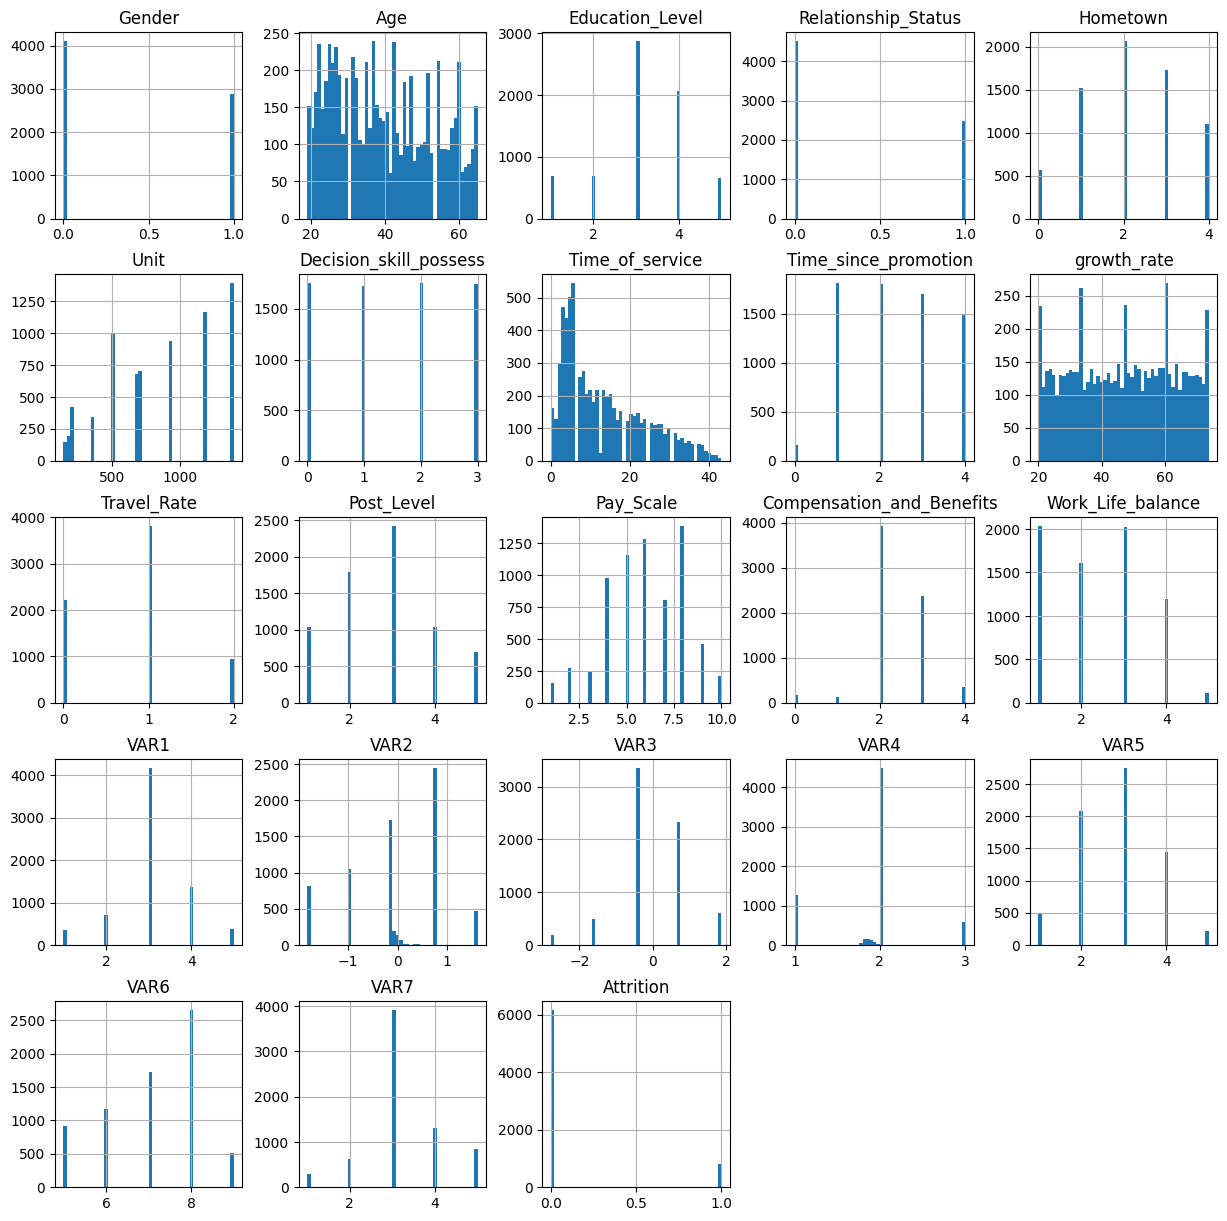

In [23]:
df.hist(bins=50, figsize=(15, 15))

In [24]:
df.drop(['VAR3', 'VAR4','VAR6'], axis = 1, inplace=True)

In [25]:
X = df.drop('Attrition', axis = 1)
y = df['Attrition']
# print(X.head())
# print(y.head())


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, stratify = y,  random_state = 52)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4886, 19) (4886,)
(2095, 19) (2095,)


In [27]:
print(y_train.value_counts())
print(y_test.value_counts())

Attrition
0    4313
1     573
Name: count, dtype: int64
Attrition
0    1850
1     245
Name: count, dtype: int64


In [28]:
X_train.isna().sum()

Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR5                         0
VAR7                         0
dtype: int64

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]
feature_importance_rf = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance_rf = feature_importance_rf.drop(['Age', 'Hometown'])
feature_importance_rf = feature_importance_rf.drop(['VAR2'])
top_features = feature_importance_rf.nlargest(5)
print("\nTop 5 Features Contributing to Attrition (based on Random Forest):")
print(top_features)



Top 5 Features Contributing to Attrition (based on Random Forest):
growth_rate        0.104946
Time_of_service    0.089685
Unit               0.066897
Pay_Scale          0.065005
Post_Level         0.049803
dtype: float64


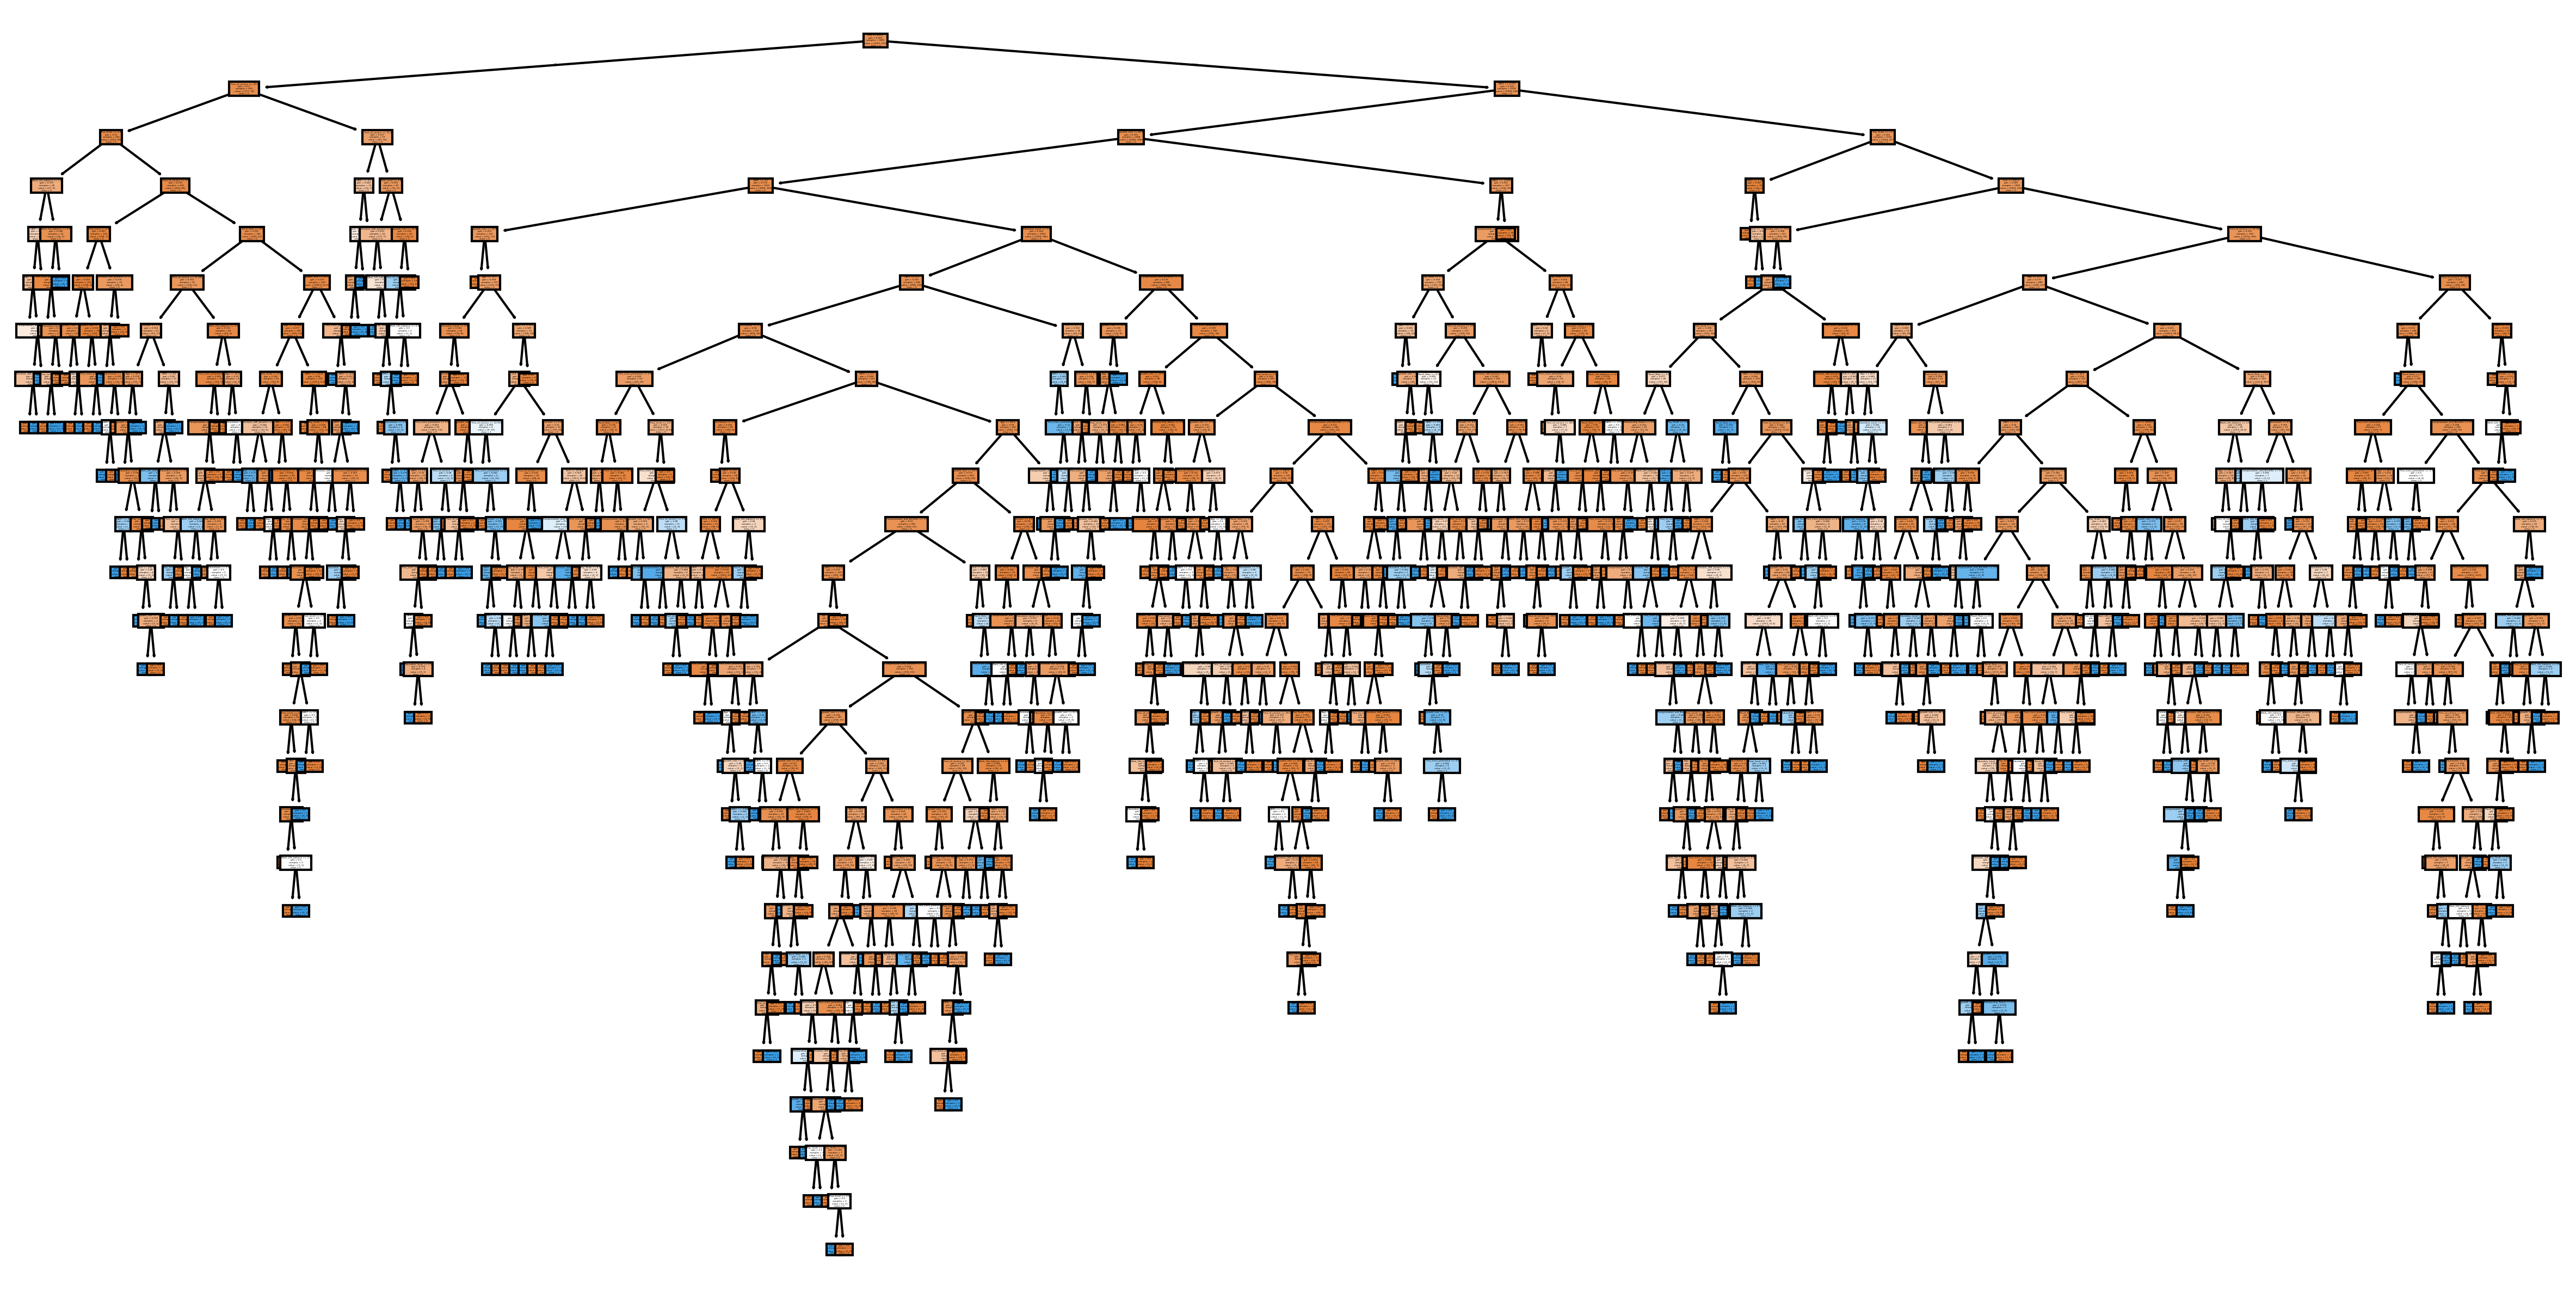

In [30]:
from sklearn.tree import plot_tree
fn = X_train.columns  # Assuming X_train has column names
cn = y_train.unique().astype(str)  # Assuming y_train has class names

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 10), dpi=300)
plot_tree(rf_model.estimators_[0],
          feature_names=fn, 
          class_names=cn,
          filled=True)
fig.savefig('rf_individualtree.png')

# Show the plot
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [31]:
from sklearn.metrics import accuracy_score, precision_score,confusion_matrix, recall_score, f1_score, roc_auc_score, roc_auc_score, precision_recall_curve
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {acc}")
print(f"Precision: {prec}")
print(f"Recall: {rec}")
print(f"F1 Score: {f1}")

Accuracy: 0.8844868735083532
Precision: 1.0
Recall: 0.012244897959183673
F1 Score: 0.024193548387096774


In [32]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1850
           1       1.00      0.01      0.02       245

    accuracy                           0.88      2095
   macro avg       0.94      0.51      0.48      2095
weighted avg       0.90      0.88      0.83      2095



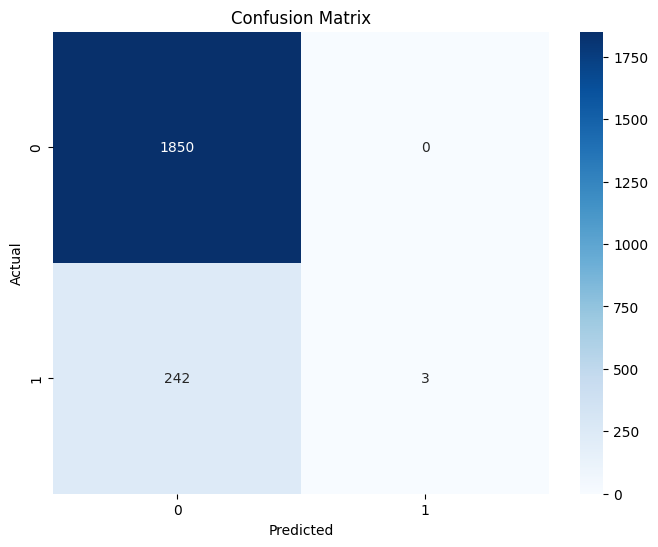

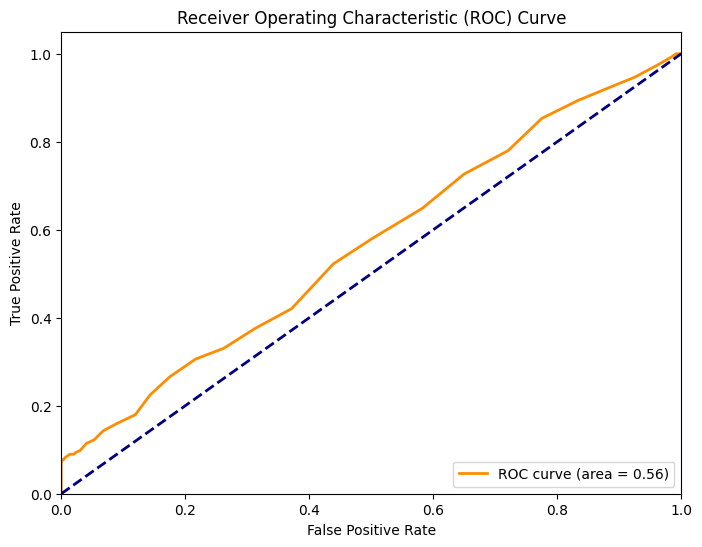

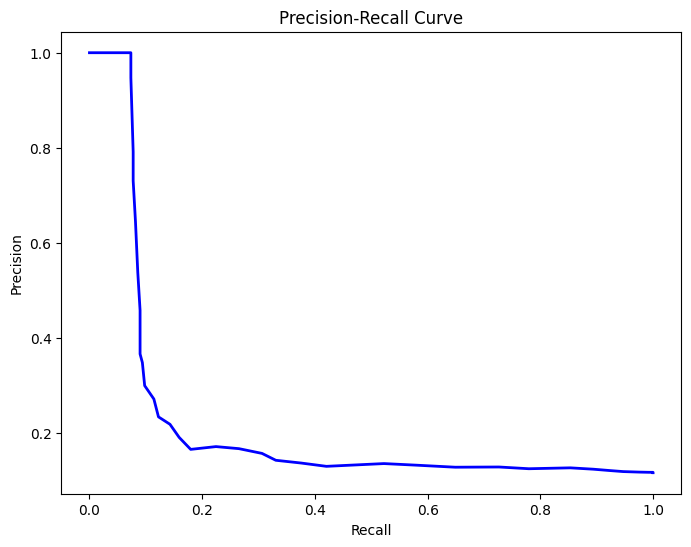

In [33]:
from sklearn.metrics import roc_curve
# Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [34]:
def generate_recommendations(employee_data, top_features, X_train):
    recommendations = []
    for feature_name in top_features.index:
        feature_idx = X.columns.get_loc(feature_name)
        feature_value = employee_data[feature_idx]
        feature_mean = X_train[feature_name].mean()
        feature_std = X_train[feature_name].std()
        
        lower_threshold = feature_mean - feature_std
        upper_threshold = feature_mean + feature_std
        
        if feature_value < lower_threshold:
            recommendations.append(f"Consider improving {feature_name}, as it is significantly lower than the average.")
        elif feature_value > upper_threshold:
            recommendations.append(f"Consider maintaining or optimizing {feature_name}, as it is significantly higher than the average.")
        else:
            recommendations.append(f"Consider enhancing {feature_name} for better satisfaction and performance.")
    
    return recommendations

leaving_indices = [i for i, pred in enumerate(y_pred) if pred == 1]

employee_recommendations = []
for i in leaving_indices:
    employee_data = X_test.iloc[i]
    recommendations = generate_recommendations(employee_data, top_features, X_train)
    employee_recommendations.append((i, recommendations))

for emp_id, recs in employee_recommendations:
    print(f"\nEmployee Index: {emp_id}")
    for rec in recs:
        print(rec)


Employee Index: 106
Consider enhancing growth_rate for better satisfaction and performance.
Consider enhancing Time_of_service for better satisfaction and performance.
Consider improving Unit, as it is significantly lower than the average.
Consider improving Pay_Scale, as it is significantly lower than the average.
Consider maintaining or optimizing Post_Level, as it is significantly higher than the average.

Employee Index: 785
Consider maintaining or optimizing growth_rate, as it is significantly higher than the average.
Consider enhancing Time_of_service for better satisfaction and performance.
Consider enhancing Unit for better satisfaction and performance.
Consider enhancing Pay_Scale for better satisfaction and performance.
Consider maintaining or optimizing Post_Level, as it is significantly higher than the average.

Employee Index: 1654
Consider maintaining or optimizing growth_rate, as it is significantly higher than the average.
Consider enhancing Time_of_service for better 

/var/folders/04/snd2w4552q96vrj1ypkknxdr0000gn/T/ipykernel_5320/2550139608.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  feature_value = employee_data[feature_idx]
